# Exploring & Testing FFT/Cross Correlation Algorithms
## Sam Potter
## Current: 1/30/18

## Path and Imports

In [1]:
# bootstrap $PATH
import sys
import os
sys.path.extend(['C:\\Users\\potterst1\\Desktop\Repositories\BitBucket\dic',
                 'C:/Users/potterst1/Desktop/Repositories/BitBucket/dic'])
sys.path.extend(['/workspace/stpotter/git/bitbucket/dic'])
import warnings
from dic import nurbs
from dic import fileIO
from dic import numerics
from dic import analysis
from dic import image_processing
import cv2
from matplotlib import pyplot as plt
import numpy as np
from geomdl import BSpline as bs
from geomdl import utilities as gutil
import scipy.optimize as sciopt

## Magics

In [2]:
%matplotlib inline

### Read in ref image file

In [3]:
# Read
# Hard code absolute paths for now. Fix later'
dic_name = 'C:\\Users\\potterst1\\Desktop\\Repositories\\BitBucket\\dic\\data\\DIC_S_cropped_gray_pad_0.tiff'
psfdi_name = 'C:\\Users\\potterst1\\Desktop\\Repositories\\BitBucket\\dic\\data\\DOA_cropped_gray_pad_0.tiff'
dic_name = '/workspace/stpotter/git/bitbucket/dic/data/DIC_S_cropped_gray_pad_0.tiff'
psfdi_name = '/workspace/stpotter/git/bitbucket/dic/data/DOSA_cropped_gray_pad_0.tiff'
ref_image = cv2.imread(dic_name, -1)  # Read in image 'as is'
ref_image = ref_image.astype('uint8')

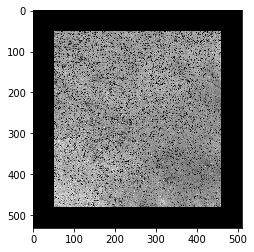

In [4]:
# Display
plt.imshow(ref_image, cmap='gray')

## Deform Ref Image

In [5]:
# Translate image in x
transx = np.array([[1.0, 0.0, 5.0],
                   [0.0, 1.0, 0.0]])
def_image = image_processing.im_warp(ref_image, transx)

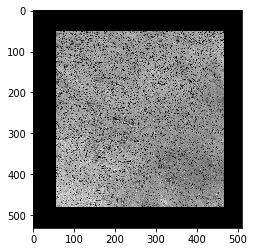

In [6]:
# Display
plt.imshow(def_image, cmap='gray')

## Manually Specify Region of Interest

In [7]:
# Format: [column index for start of X, column index for end of X, row index for start of Y, row index for end of Y]
subregion_indices = np.array([225, 275, 225, 275])

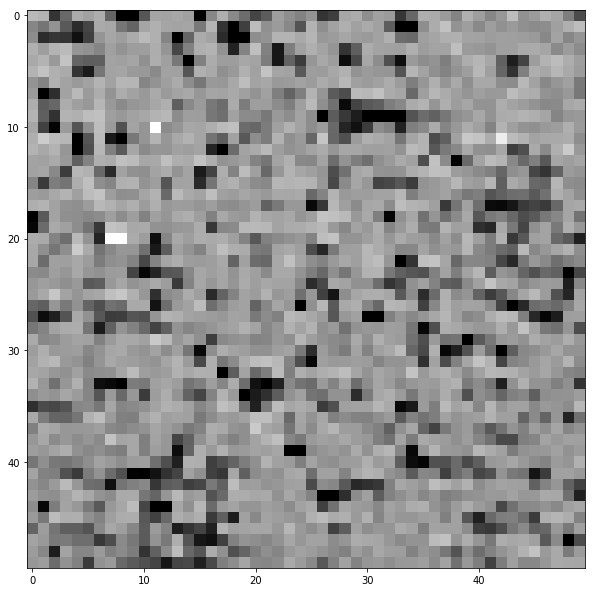

In [8]:
# Extract these regions from ref image and plot
ref_subimage = ref_image[subregion_indices[2]:subregion_indices[3], subregion_indices[0]:subregion_indices[1]]
fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(ref_subimage, cmap='gray')
plt.show()

## Compute Cross Correlation

In [11]:
# Pad array
ref_image.shape

(531, 509)